<a href="https://colab.research.google.com/github/Alankruthisaieni/Admission_Prediction/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tkinter as tk

importing dataset

In [ ]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [ ]:
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

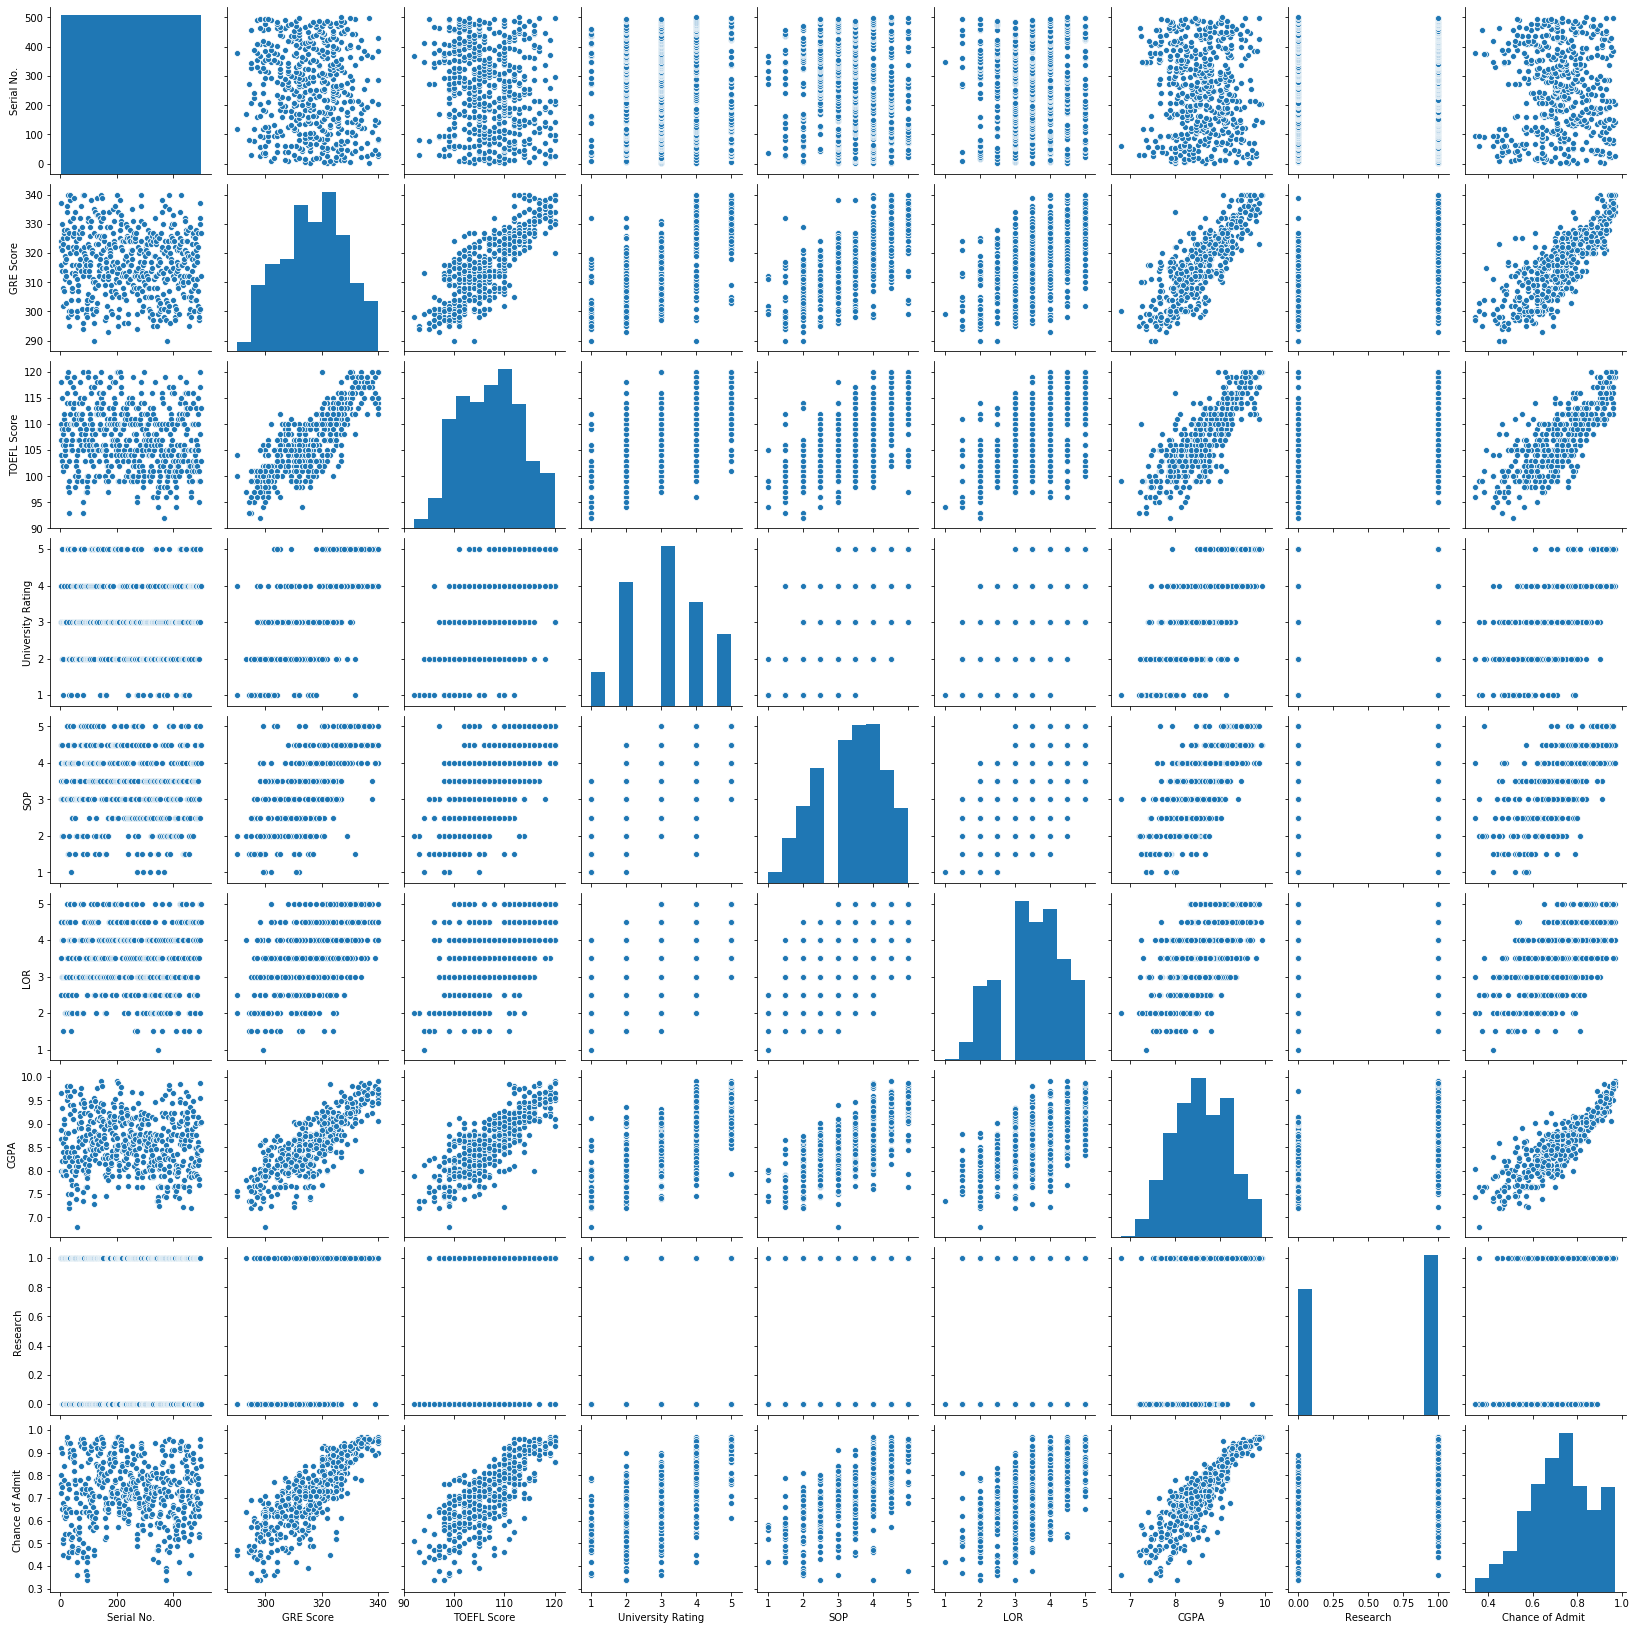

In [ ]:
sns.pairplot(df)

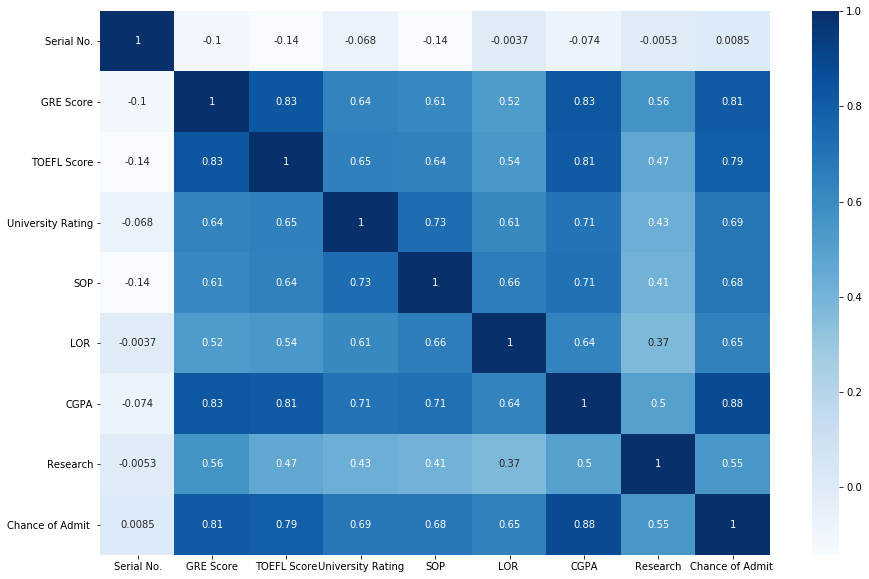

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [ ]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

performing feature scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=11)

# multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)
mlr = (lr.score(x_te, y_te))*100

In [ ]:
y_pred1 = lr.predict(x_te)
from sklearn.metrics import r2_score,mean_squared_error
mlr_mse = mean_squared_error(y_te,y_pred1)
mlr_r2 = r2_score(y_te,y_pred1)
mlr_ = (lr.score(x_te, y_te))*100
print("MSE: ",mlr_mse)
print("r2_score: ",mlr_r2)


MSE:  0.002631401794637189
r2_score:  0.8770310359435509


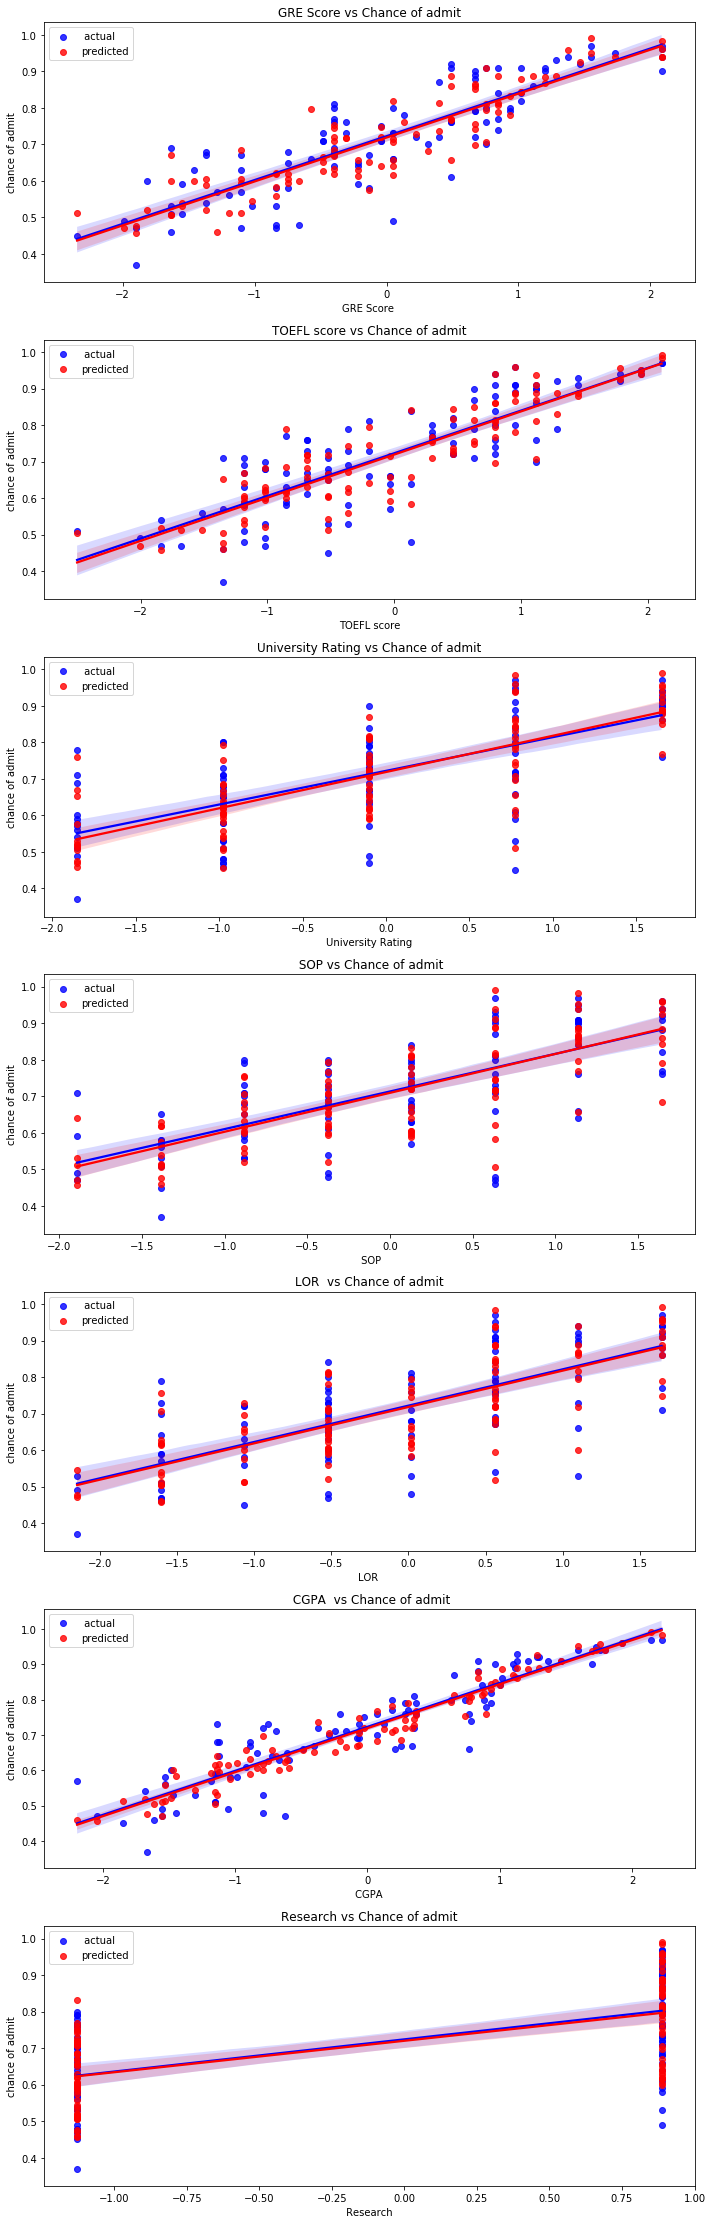

In [ ]:
dt=[x_te[:,0],x_te[:,1],x_te[:,2],x_te[:,3],x_te[:,4],x_te[:,5],x_te[:,6],y_te,y_pred1]
f, ax = plt.subplots(7,1,figsize=(10, 31))
sns.regplot(x=x_te[:,0],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[0])
sns.regplot(x=x_te[:,0],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[0])
ax[0].legend()
ax[0].set_title('GRE Score vs Chance of admit')
ax[0].set_xlabel('GRE Score ')
ax[0].set_ylabel('chance of admit')
ax[0].axis('tight')

sns.regplot(x=x_te[:,1],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[1])
sns.regplot(x=x_te[:,1],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[1])
ax[1].legend()
ax[1].set_title('TOEFL score vs Chance of admit')
ax[1].set_xlabel('TOEFL score')
ax[1].set_ylabel('chance of admit')
ax[1].axis('tight')

sns.regplot(x=x_te[:,2],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[2])
sns.regplot(x=x_te[:,2],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[2])
ax[2].set_title('University Rating vs Chance of admit')
ax[2].set_xlabel('University Rating')
ax[2].set_ylabel('chance of admit')
ax[2].axis('tight')
ax[2].legend()
                     
sns.regplot(x=x_te[:,3],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[3])
sns.regplot(x=x_te[:,3],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[3])
ax[3].set_title(' SOP vs Chance of admit')
ax[3].set_xlabel(' SOP')
ax[3].set_ylabel('chance of admit')
ax[3].axis('tight')
ax[3].legend()
                     
sns.regplot(x=x_te[:,4],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[4])
sns.regplot(x=x_te[:,4],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[4])
ax[4].set_title('LOR  vs Chance of admit')
ax[4].set_xlabel('LOR ')
ax[4].set_ylabel('chance of admit')
ax[4].axis('tight')
ax[4].legend()

sns.regplot(x=x_te[:,5],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[5])
sns.regplot(x=x_te[:,5],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[5])
ax[5].set_title(' CGPA  vs Chance of admit')
ax[5].set_xlabel(' CGPA ')
ax[5].set_ylabel('chance of admit')
ax[5].axis('tight')
ax[5].legend()

sns.regplot(x=x_te[:,6],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[6])
sns.regplot(x=x_te[:,6],y=y_pred1,data=dt,color='red',label='predicted',ax=ax[6])
ax[6].set_title('Research vs Chance of admit')
ax[6].set_xlabel(' Research ')
ax[6].set_ylabel('chance of admit')
ax[6].axis('tight')
ax[6].legend()

fig.tight_layout() 
plt.tight_layout()

# Random Forest Regression Model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=10)
rfr.fit(x_tr,y_tr)
rfr_ = (rfr.score(x_te, y_te))*100

In [ ]:
y_pred2 = rfr.predict(x_te)
from sklearn.metrics import r2_score,mean_squared_error
rfr_mse = mean_squared_error(y_te,y_pred2)
rfr_r2 = r2_score(y_te,y_pred2)
print("MSE: ",rfr_mse)
print("r2_score: ",rfr_r2)

MSE:  0.003254660599999999
r2_score:  0.8479053091956554


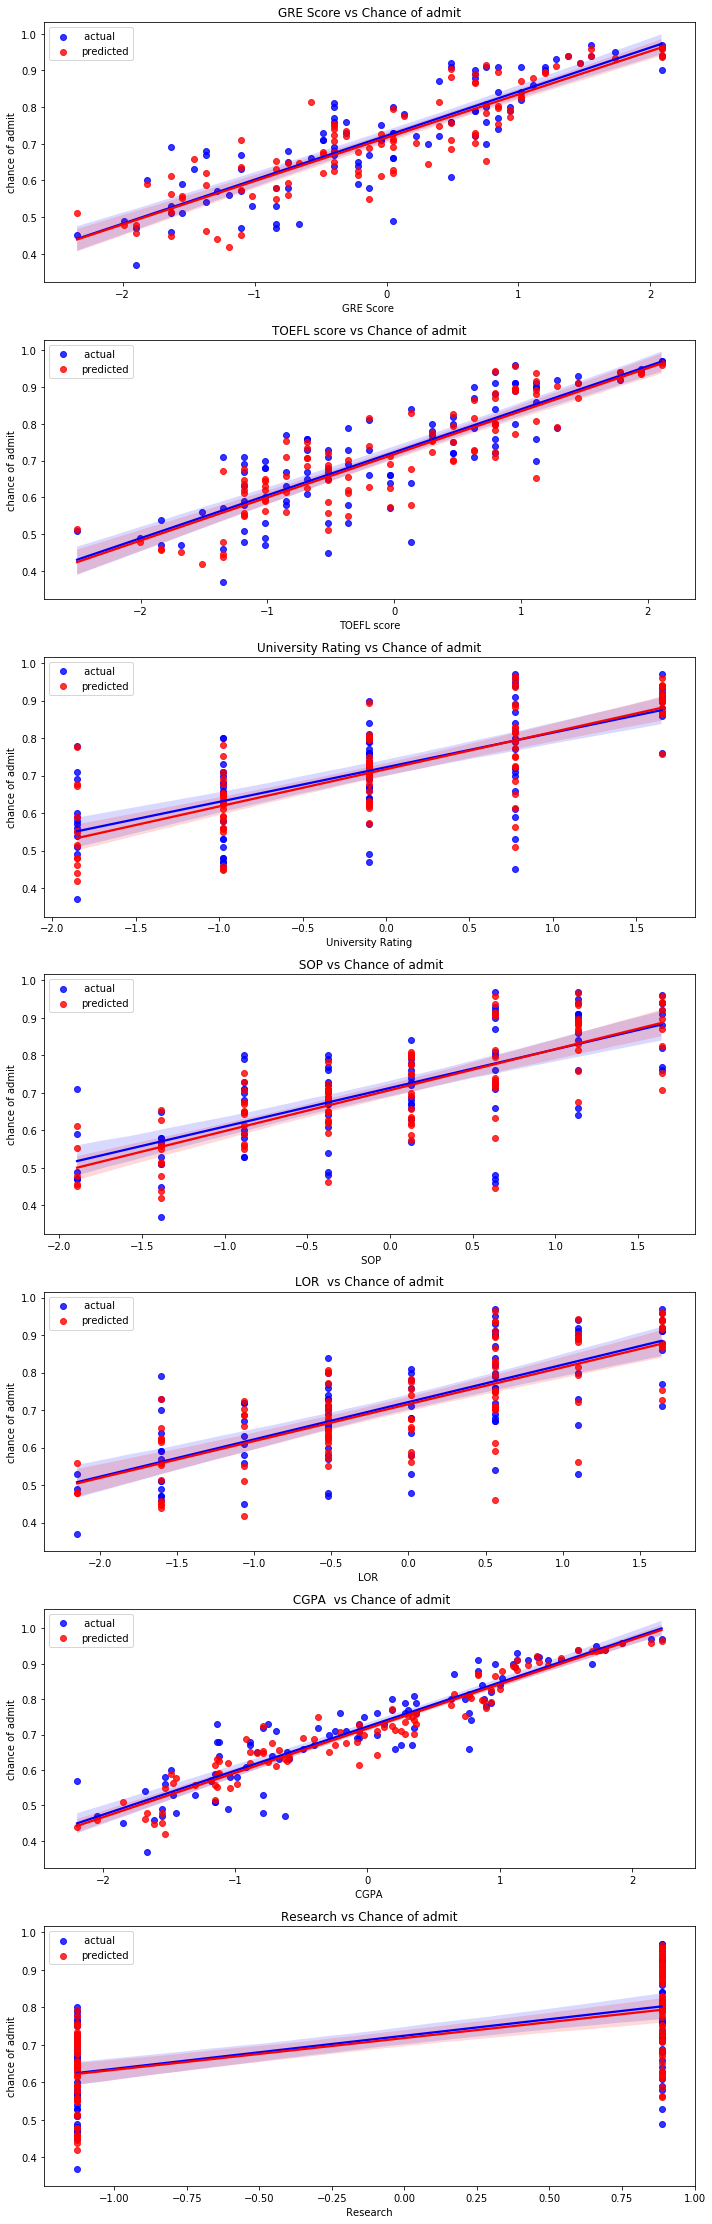

In [ ]:
dt=[x_te[:,0],x_te[:,1],x_te[:,2],x_te[:,3],x_te[:,4],x_te[:,5],x_te[:,6],y_te,y_pred2]
f, ax = plt.subplots(7,1,figsize=(10, 31))
sns.regplot(x=x_te[:,0],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[0])
sns.regplot(x=x_te[:,0],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[0])
ax[0].legend()
ax[0].set_title('GRE Score vs Chance of admit')
ax[0].set_xlabel('GRE Score ')
ax[0].set_ylabel('chance of admit')
ax[0].axis('tight')

sns.regplot(x=x_te[:,1],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[1])
sns.regplot(x=x_te[:,1],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[1])
ax[1].legend()
ax[1].set_title('TOEFL score vs Chance of admit')
ax[1].set_xlabel('TOEFL score')
ax[1].set_ylabel('chance of admit')
ax[1].axis('tight')

sns.regplot(x=x_te[:,2],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[2])
sns.regplot(x=x_te[:,2],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[2])
ax[2].set_title('University Rating vs Chance of admit')
ax[2].set_xlabel('University Rating')
ax[2].set_ylabel('chance of admit')
ax[2].axis('tight')
ax[2].legend()
                     
sns.regplot(x=x_te[:,3],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[3])
sns.regplot(x=x_te[:,3],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[3])
ax[3].set_title(' SOP vs Chance of admit')
ax[3].set_xlabel(' SOP')
ax[3].set_ylabel('chance of admit')
ax[3].axis('tight')
ax[3].legend()
                     
sns.regplot(x=x_te[:,4],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[4])
sns.regplot(x=x_te[:,4],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[4])
ax[4].set_title('LOR  vs Chance of admit')
ax[4].set_xlabel('LOR ')
ax[4].set_ylabel('chance of admit')
ax[4].axis('tight')
ax[4].legend()

sns.regplot(x=x_te[:,5],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[5])
sns.regplot(x=x_te[:,5],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[5])
ax[5].set_title(' CGPA  vs Chance of admit')
ax[5].set_xlabel(' CGPA ')
ax[5].set_ylabel('chance of admit')
ax[5].axis('tight')
ax[5].legend()

sns.regplot(x=x_te[:,6],y=y_te,data=dt,color='blue',label=' actual ',ax=ax[6])
sns.regplot(x=x_te[:,6],y=y_pred2,data=dt,color='red',label='predicted',ax=ax[6])
ax[6].set_title('Research vs Chance of admit')
ax[6].set_xlabel(' Research ')
ax[6].set_ylabel('chance of admit')
ax[6].axis('tight')
ax[6].legend()

fig.tight_layout() 
plt.tight_layout()

# MLR with PCA

Choosing the number of component

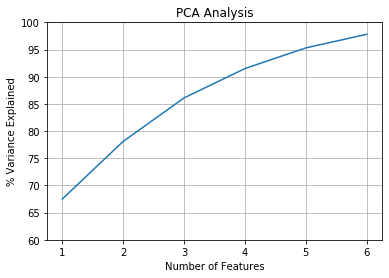

In [ ]:
from sklearn.decomposition import PCA
pca_= PCA(n_components=6)
x_1= pca_.fit_transform(x)
variance=pca_.explained_variance_ratio_
var=np.cumsum(np.round(variance, decimals=3)*100)
nc=np.array([1,2,3,4,5,6])
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(60,100)
plt.plot(nc,var)
plt.grid(True)

75% of the variance is explained by 2 component

In [ ]:
from sklearn.decomposition import PCA
pca_= PCA(n_components=2)
x1= pca_.fit_transform(x)
print(pca_.explained_variance_ratio_)

[0.67519343 0.10596446]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 11)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_test,y_test)
mlr_pca=(mlr.score(x_test, y_test))*100

In [ ]:
y_pred3 = mlr.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mlr_pca_mse = mean_squared_error(y_test,y_pred3)
mlr_pca_r2 = r2_score(y_test,y_pred3)
print("MSE: ",mlr_pca_mse)
print("r2_score: ",mlr_pca_r2)

MSE:  0.003605637608842194
r2_score:  0.8315036789798081


(-2.1642788252437968,
 2.1258953710743813,
 0.3248233995584988,
 1.015176600441501)

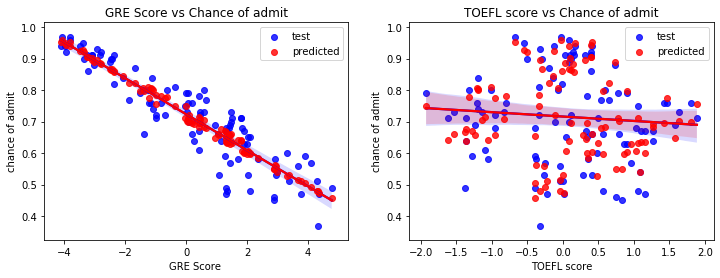

In [ ]:
dt2=[x_test[:,0],x_test[:,1],y_test,y_pred3]
f, ax = plt.subplots(1, 2,figsize=(12, 4))
sns.regplot(x=x_test[:,0],y=y_test,data=dt2,color='blue',label='test',ax=ax[0],)
sns.regplot(x=x_test[:,0],y=y_pred3,data=dt2,color='red',label='predicted',ax=ax[0])
ax[0].legend()
ax[0].set_title('GRE Score vs Chance of admit')
ax[0].set_xlabel('GRE Score ')
ax[0].set_ylabel('chance of admit')
ax[0].axis('tight')

sns.regplot(x=x_test[:,1],y=y_test,data=dt2,color='blue',label='test',ax=ax[1])
sns.regplot(x=x_test[:,1],y=y_pred3,data=dt2,color='red',label='predicted',ax=ax[1])
ax[1].legend()
ax[1].set_title('TOEFL score vs Chance of admit')
ax[1].set_xlabel('TOEFL score')
ax[1].set_ylabel('chance of admit')
ax[1].axis('tight')

# RFR with PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x2 = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.67519343 0.10596446]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size = 0.2,random_state = 11)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(n_estimators=100, random_state=0)
rfr2.fit(x_train,y_train)
rfr_pca=(rfr2.score(x_test, y_test))*100

In [ ]:
y_pred4 = rfr2.predict( x_test)
from sklearn.metrics import r2_score,mean_squared_error
rfr_pca_mse = mean_squared_error(y_test,y_pred4)
rfr_pca_r2 = r2_score(y_test,y_pred4)
print("MSE: ",rfr_pca_mse)
print("r2_score: ",rfr_pca_r2)

MSE:  0.004197565000000001
r2_score:  0.8038421115841882


(-2.1642788252437968,
 2.1258953710743813,
 0.3248233995584988,
 1.015176600441501)

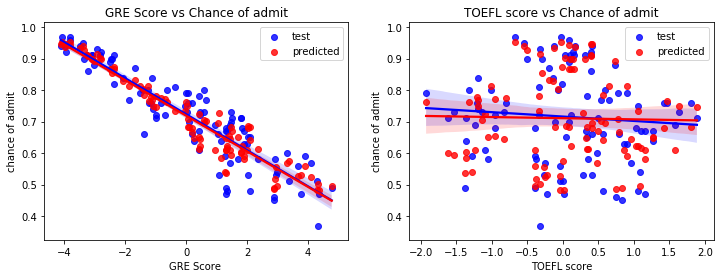

In [ ]:
dt=[x_test[:,0],x_test[:,1],y_test,y_pred4]
f, ax = plt.subplots(1, 2,figsize=(12, 4))
sns.regplot(x=x_test[:,0],y=y_test,data=dt,color='blue',label='test',ax=ax[0],)
sns.regplot(x=x_test[:,0],y=y_pred4,data=dt,color='red',label='predicted',ax=ax[0])
ax[0].legend()
ax[0].set_title('GRE Score vs Chance of admit')
ax[0].set_xlabel('GRE Score ')
ax[0].set_ylabel('chance of admit')
ax[0].axis('tight')

sns.regplot(x=x_test[:,1],y=y_test,data=dt,color='blue',label='test',ax=ax[1])
sns.regplot(x=x_test[:,1],y=y_pred4,data=dt,color='red',label='predicted',ax=ax[1])
ax[1].legend()
ax[1].set_title('TOEFL score vs Chance of admit')
ax[1].set_xlabel('TOEFL score')
ax[1].set_ylabel('chance of admit')
ax[1].axis('tight')

# Result

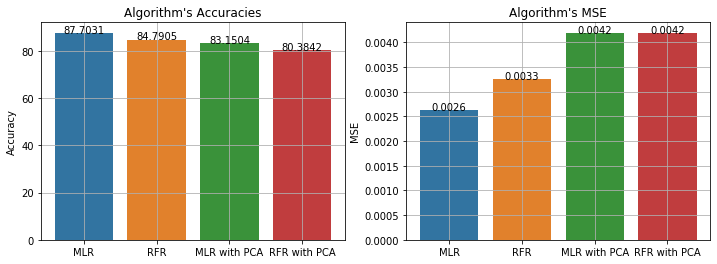

In [ ]:
Methods=['MLR', 'RFR', 'MLR with PCA','RFR with PCA']
Scores1=np.array([mlr_,rfr_,mlr_pca,rfr_pca])
Scores2=np.array([mlr_mse,rfr_mse,rfr_pca_mse,rfr_pca_mse])

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.4f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.barplot(Methods, Scores1,ax=ax[0])
ax[0].set_title("Algorithm's Accuracies")
ax[0].set_ylabel('Accuracy')
ax[0].axis('tight')
ax[0].grid(True)
show_values_on_bars(ax[0])

sns.barplot(Methods, Scores2,ax=ax[1])
ax[1].set_title("Algorithm's MSE")
ax[1].set_ylabel('MSE')
ax[1].axis('tight')
ax[1].grid(True)
show_values_on_bars(ax[1])

based on the above graph Multiple Liner Regression is the most preferable model 

In [ ]:
x2=df.iloc[:,1:-1].values
y2=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_tr1,x_te1,y_tr1,y_te1=train_test_split(x2,y2,test_size=0.2,random_state=11)

from sklearn.linear_model import LinearRegression
lr_ = LinearRegression()
lr_.fit(x_tr1,y_tr1)

root= tk.Tk()
canvas1 = tk.Canvas(root, width = 550, height = 300)
canvas1.pack()

# GRE Score
label1 = tk.Label(root, text='GRE Score:')
canvas1.create_window(137, 60, window=label1)

entry1 = tk.Entry(root)
canvas1.create_window(280, 60, window=entry1)

# TOEFL Score:
label2 = tk.Label(root, text='TOEFL Score:')
canvas1.create_window(142, 80, window=label2)

entry2 = tk.Entry(root)
canvas1.create_window(280, 80, window=entry2)

# University Rating
label3 = tk.Label(root, text='   University Rating:')
canvas1.create_window(150, 100, window=label3)

entry3 = tk.Entry(root)
canvas1.create_window(280, 100, window=entry3)

# SOP
label4 = tk.Label(root, text='SOP:')
canvas1.create_window(120, 120, window=label4)

entry4 = tk.Entry(root)
canvas1.create_window(280, 120, window=entry4)

#LOR
label5 = tk.Label(root, text='LOR:')
canvas1.create_window(120, 140, window=label5)

entry5 = tk.Entry(root)
canvas1.create_window(280, 140, window=entry5)

#CGPA
label6 = tk.Label(root, text='CGPA:')
canvas1.create_window(125, 160, window=label6)

entry6 = tk.Entry(root)
canvas1.create_window(280, 160, window=entry6)

#Research
label7 = tk.Label(root, text='Research:')
canvas1.create_window(125, 180, window=label7)

entry7 = tk.Entry(root)
canvas1.create_window(280, 180, window=entry7)

def values(): 
    global GRE_Score
    GRE_Score = float(entry1.get()) 
    
    global TOEFL_Score
    TOEFL_Score = float(entry2.get()) 
    
    global University_Rating
    University_Rating = float(entry3.get()) 
    
    global SOP
    SOP = float(entry4.get()) 
    
    global LOR
    LOR = float(entry5.get())
    
    global CGPA
    CGPA = float(entry6.get())
                
    global Research
    Research = float(entry7.get())            
    
    Prediction_result  = ('  Predicted Result: ',lr_.predict([[GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research]]),)
    label_Prediction = tk.Label(root, text= Prediction_result, bg='sky blue')
    label_Prediction.config(font=("Courier", 15))
    canvas1.create_window(270, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='      Predict      ',command=values, bg='green', fg='white', font=11)
canvas1.create_window(270, 220, window=button1)
 
root.mainloop()